# NN - Multi-layer Perceptron Classifier (MLPClassifier)
## Using Scikitlearn
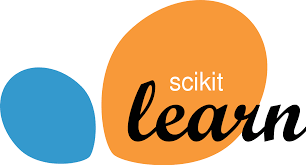
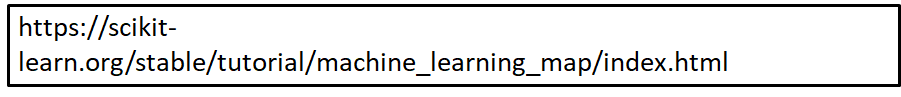

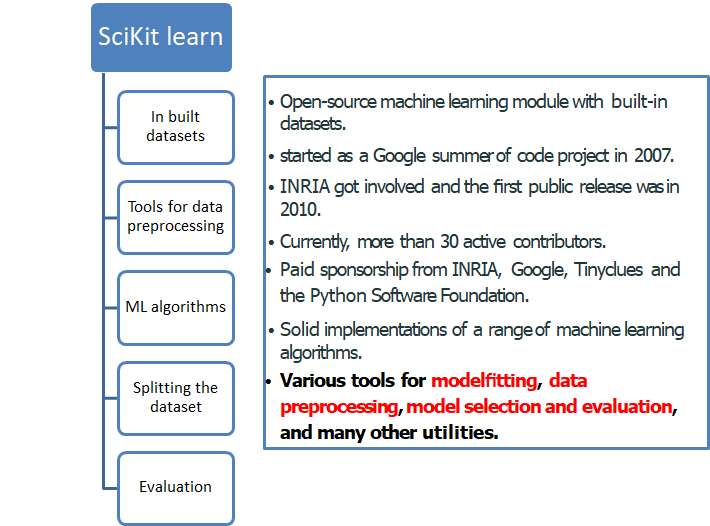

1 Introduction

2 Loading the libraries

3 MLPClassifier for binary Classification
- 3.1 Loading the data
- 3.2 Data pre-processing
- 3.3 MLPClassifier
- 3.4 Model Evaluation
- 3.5 Hyper Parameter Tuning

4 MLPClassifier for Multi-Class Classification
- 4.1 Loading the data
- 4.2 Data pre-processing
- 4.3 MLPClassifier
- 4.4 Model Evaluation
- 4.5 Hyper Parameter Tuning

5 Final notes

# 1 Introduction

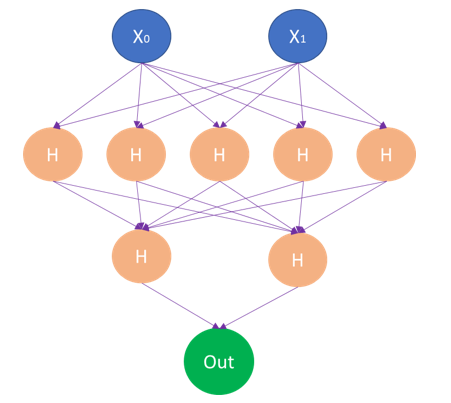

# 2 Loading the libraries

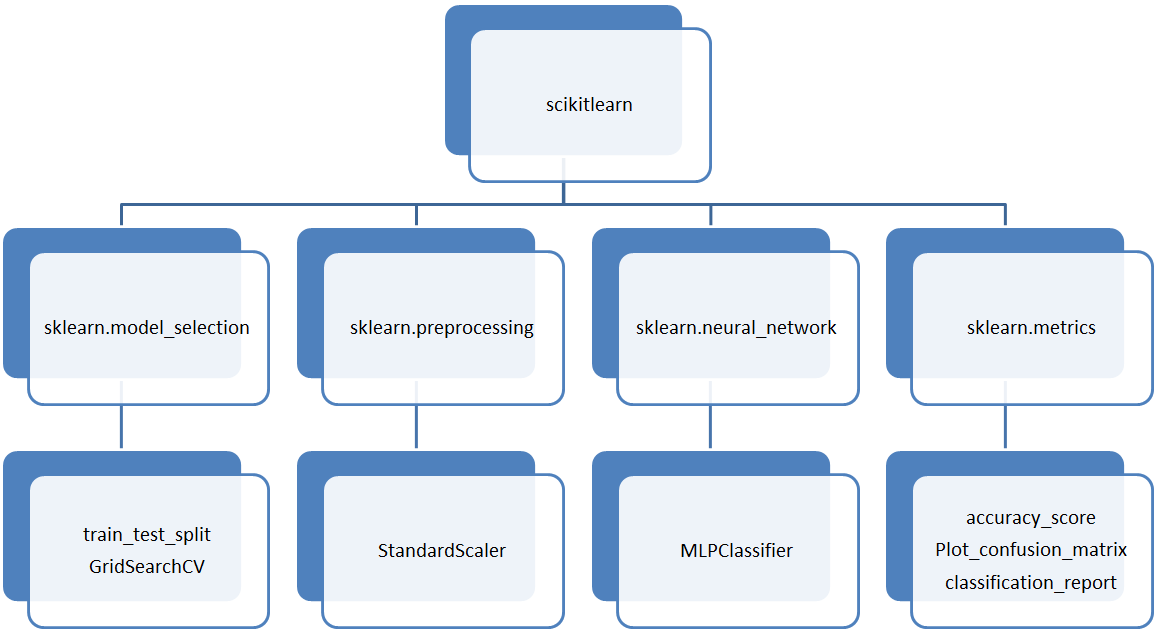

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

from sklearn.model_selection import GridSearchCV

# 3 MLPClassifier for binary Classification


    The multilayer perceptron (MLP) is a feedforward artificial neural network model that maps input data sets to a set of appropriate outputs. 
    An MLP consists of multiple layers and each layer is fully connected to the following one. 
    The nodes of the layers are neurons with nonlinear activation functions, except for the nodes of the input layer. 
    Between the input and the output layer there may be one or more nonlinear hidden layers.

### 3.1 Loading the data

In [4]:
df = pd.read_csv('Data/winequality.csv').dropna()
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,red,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


Let’s have a look at the target variable:

In [5]:
df['type'].value_counts()

white    4870
red      1593
Name: type, dtype: int64

### 3.2 Data pre-processing

In [7]:
x = df.drop('type', axis=1)
y = df['type']

trainX, testX, trainY, testY = train_test_split(x, y, test_size = 0.2, random_state=0)

To train a MLP network, the data should always be scaled because it is very sensitive to it.

In [8]:
sc=StandardScaler()

scaler = sc.fit(trainX)
trainX_scaled = scaler.transform(trainX)
testX_scaled = scaler.transform(testX)

# 3.3 MLPClassifier
### Example of an MLP having 2 hidden layers. The first layer has 5 neurons and the second layer has 2 neurons
### After defining the number of hidden layers, we need to specify the maximum number of iterations, the activation function and the optimizer (solver)

The network structure created in the process would look like:
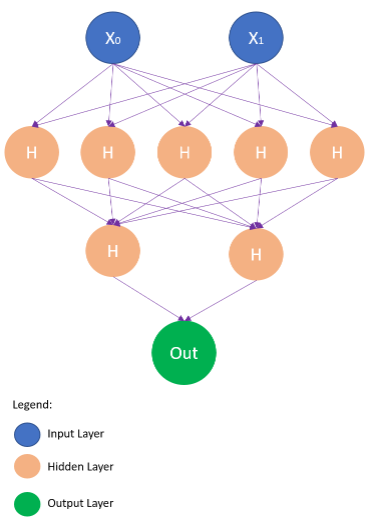

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp_clf = MLPClassifier(hidden_layer_sizes=(5,2),
                        max_iter = 300, activation = 'relu',
                        solver = 'adam')

- hidden_layer_sizes : With this parameter we can specify the number of layers and the number of nodes we want to have in the Neural Network Classifier. Each element in the tuple represents the number of nodes at the ith position, where i is the index of the tuple. Thus, the length of the tuple indicates the total number of hidden layers in the neural network.

- max_iter: Indicates the number of epochs.

- activation: The activation function for the hidden layers.

- solver: This parameter specifies the algorithm for weight optimization over the nodes.

#### Practically, we need to have higher number of neurons and higher number of hidden layers. 
##### So building an MLP, with the following specifications:
    
    No of hidden layers - 3
    first layer - 150 neurons
    second layer - 100 neurons
    third layer - 50 neurons
    Activation function - relu
    Solver - adam

In [9]:
mlp_clf = MLPClassifier(hidden_layer_sizes=(150,100,50),
                        max_iter = 300,activation = 'relu',
                        solver = 'adam')

mlp_clf.fit(trainX_scaled, trainY)

MLPClassifier(hidden_layer_sizes=(150, 100, 50), max_iter=300)

# 3.4 Model Evaluation
The metrics that can be used to measure the performance of classification algorithms should be known. Otherwise, you can read about them here.

In [10]:
from sklearn.metrics import accuracy_score 
y_pred = mlp_clf.predict(testX_scaled)

print('Accuracy: {:.2f}'.format(accuracy_score(testY, y_pred)))

Accuracy: 0.99


In [11]:
import matplotlib.pyplot as plt

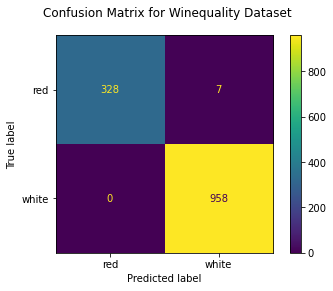

In [12]:
fig = plot_confusion_matrix(mlp_clf, testX_scaled, testY, display_labels=mlp_clf.classes_)
fig.figure_.suptitle("Confusion Matrix for Winequality Dataset")
plt.show()

In [13]:
from sklearn.metrics import classification_report

In [14]:
print(classification_report(testY, y_pred))

              precision    recall  f1-score   support

         red       1.00      0.98      0.99       335
       white       0.99      1.00      1.00       958

    accuracy                           0.99      1293
   macro avg       1.00      0.99      0.99      1293
weighted avg       0.99      0.99      0.99      1293



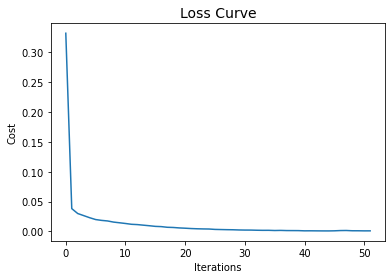

In [15]:
plt.plot(mlp_clf.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

# 3.5 Hyper Parameter Tuning

In [16]:
param_grid = {
    'hidden_layer_sizes': [(150,100,50), (120,80,40), (100,50,30)],
    'max_iter': [50, 100, 150],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

In [17]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC

In [18]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(mlp_clf, param_grid, n_jobs= -1, cv=5)
grid.fit(trainX_scaled, trainY)

print(grid.best_params_) 
print(clf.best_score_)

grid_predictions = grid.predict(testX_scaled) 

print('Accuracy: {:.2f}'.format(accuracy_score(testY, grid_predictions)))

# 4 MLPClassifier for Multi-Class Classification
With an MLP, multi-class classifications can of course also be carried out.

# 4.1 Loading the data

In [21]:
df = pd.read_csv('Data/Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [22]:
df['Species'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

C:\Users\maagarwal\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\maagarwal\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\maagarwal\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\m

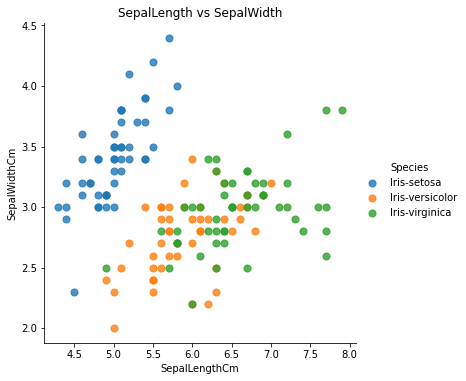

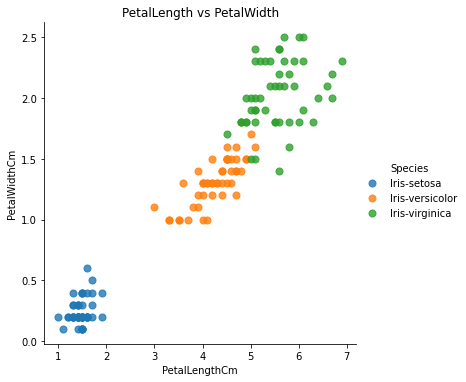

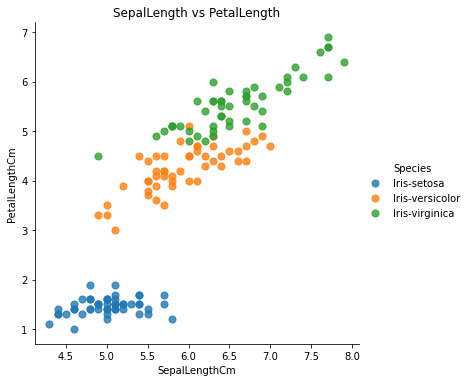

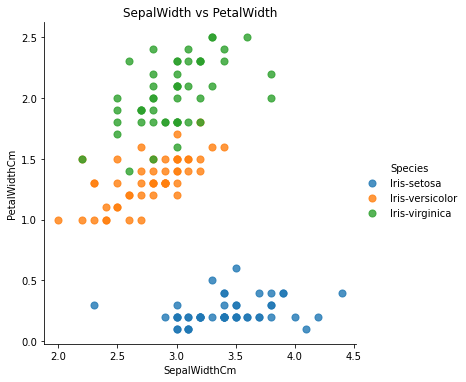

In [23]:
sns.lmplot('SepalLengthCm', 'SepalWidthCm',
           data=df,
           fit_reg=False,
           hue="Species",
           scatter_kws={"marker": "D",
                        "s": 50})
plt.title('SepalLength vs SepalWidth')

sns.lmplot('PetalLengthCm', 'PetalWidthCm',
           data=df,
           fit_reg=False,
           hue="Species",
           scatter_kws={"marker": "D",
                        "s": 50})
plt.title('PetalLength vs PetalWidth')

sns.lmplot('SepalLengthCm', 'PetalLengthCm',
           data=df,
           fit_reg=False,
           hue="Species",
           scatter_kws={"marker": "D",
                        "s": 50})
plt.title('SepalLength vs PetalLength')

sns.lmplot('SepalWidthCm', 'PetalWidthCm',
           data=df,
           fit_reg=False,
           hue="Species",
           scatter_kws={"marker": "D",
                        "s": 50})
plt.title('SepalWidth vs PetalWidth')
plt.show()

# 4.2 Data pre-processing

In [24]:
x = df.drop('Species', axis=1)
y = df['Species']

trainX, testX, trainY, testY = train_test_split(x, y, test_size = 0.2)

In [25]:
sc=StandardScaler()

scaler = sc.fit(trainX)
trainX_scaled = scaler.transform(trainX)
testX_scaled = scaler.transform(testX)

# 4.3 MLPClassifier

In [26]:
mlp_clf = MLPClassifier(hidden_layer_sizes=(150,100,50),
                        max_iter = 300,activation = 'relu',
                        solver = 'adam')

mlp_clf.fit(trainX_scaled, trainY)

MLPClassifier(hidden_layer_sizes=(150, 100, 50), max_iter=300)

# 4.4 Model Evaluation

In [27]:
y_pred = mlp_clf.predict(testX_scaled)

print('Accuracy: {:.2f}'.format(accuracy_score(testY, y_pred)))

Accuracy: 1.00


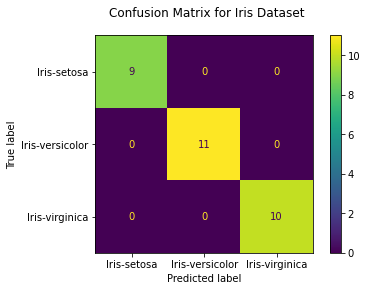

In [28]:
fig = plot_confusion_matrix(mlp_clf, testX_scaled, testY, display_labels=mlp_clf.classes_)
fig.figure_.suptitle("Confusion Matrix for Iris Dataset")
plt.show()

In [29]:
print(classification_report(testY, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       1.00      1.00      1.00        11
 Iris-virginica       1.00      1.00      1.00        10

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



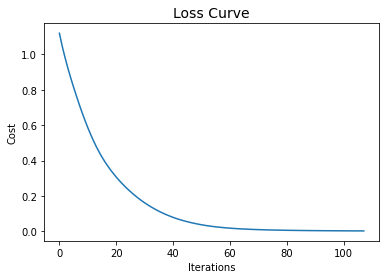

In [30]:
plt.plot(mlp_clf.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

# 4.5 Hyper Parameter Tuning

In [31]:
param_grid = {
    'hidden_layer_sizes': [(150,100,50), (120,80,40), (100,50,30)],
    'max_iter': [50, 100, 150],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

In [32]:
grid = GridSearchCV(mlp_clf, param_grid, n_jobs= -1, cv=5)
grid.fit(trainX_scaled, trainY)

print(grid.best_params_) 

{'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (150, 100, 50), 'learning_rate': 'constant', 'max_iter': 100, 'solver': 'adam'}


C:\Users\maagarwal\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [33]:
grid_predictions = grid.predict(testX_scaled) 

print('Accuracy: {:.2f}'.format(accuracy_score(testY, grid_predictions)))

Accuracy: 1.00


# 5 Final notes

#### GridSearchCV is a technique to search through the best parameter values from the given set of the grid of parameters. 
    It is basically a cross-validation (CV) method. 
    The model and the parameters are required to be fed in. 
    Best parameter values are extracted and then the predictions are made.
    Primarily, it takes 4 arguments i.e. estimator, param_grid, cv, and scoring. 

        estimator – A scikit-learn model
        param_grid – A dictionary with parameter names as keys and lists of parameter values.
        scoring – The performance measure. For example, ‘r2’ for regression models, ‘precision’ for classification models.
        cv – An integer that is the number of folds for K-fold cross-validation.
    
#### Standard Scalar: for scaling the data

#### Data Preprocessing: Check for nans, separate the data into input and output, scale the data
    
#### Performance metrics    
    TN / True Negative: when a case was negative and predicted negative
    TP / True Positive: when a case was positive and predicted positive
    FN / False Negative: when a case was positive but predicted negative
    FP / False Positive: when a case was negative but predicted positive

#### Precision – What percent of your predictions were correct?

    Precision is the ability of a classifier not to label an instance positive that is actually negative. For each class it is defined as the ratio of true positives to the sum of true and false positives.

    TP – True Positives
    FP – False Positives

    Precision – Accuracy of positive predictions.
    Precision = TP/(TP + FP)
    
#### Recall – What percent of the positive cases did you catch? 

    Recall is the ability of a classifier to find all positive instances. For each class it is defined as the ratio of true positives to the sum of true positives and false negatives.

    FN – False Negatives

    Recall: Fraction of positives that were correctly identified.
    Recall = TP/(TP+FN)
    
#### F1 score – What percent of positive predictions were correct? 

    The F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0.    
    Generally speaking, F1 scores are lower than accuracy measures as they embed precision and recall into their computation. 
    As a rule of thumb, the weighted average of F1 should be used to compare classifier models, not global accuracy.

    F1 Score = 2*(Recall * Precision) / (Recall + Precision)    

#### Reference: https://michael-fuchs-python.netlify.app/2021/02/03/nn-multi-layer-perceptron-classifier-mlpclassifier/